# Maching Learning - Logistic Regression

CS440/640


<br>      This code is about how to implement Logistic Regression                                                                      



In [1]:
# Import Python libraries
import numpy as np    # numpy is the fundamental package for scientific computing with Python, such linear algebra, array...
import matplotlib.pyplot as plt      # matplotlib is a Python 2D plotting library which produces publication quality figures.

## Logistic Regression Model 


In [2]:
class LogisticRegression:
    """
    This lab implements a Logistic Regression Classifier.
    """
    
    def __init__(self, input_dim, output_dim):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
        """
        
        self.theta = [np.random.randn(input_dim, 10),np.random.randn(10, output_dim)] / np.sqrt(input_dim)       
        self.bias = [np.zeros((1, 10)),np.zeros((1, output_dim))]
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y, Lambda=0):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        
        z1 = np.dot(X,self.theta[0]) + self.bias[0]
        exp_z1 = np.exp(z1)
        softmax_scores1 = exp_z1 / np.sum(exp_z1, axis=1, keepdims=True)

        z2 = np.dot(softmax_scores1,self.theta[1]) + self.bias[1]
        exp_z2 = np.exp(z2)
        softmax_scores2 = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores2[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)+(Lambda/2)*np.sum(self.theta[1]*self.theta[1]) #L2 Regularization
        return 1./num_examples * data_loss

    
    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z1 = np.dot(X,self.theta[0]) + self.bias[0]
        exp_z1 = np.exp(z1)
        softmax_scores1 = exp_z1 / (exp_z1 + 1)
        
        z2 = np.dot(softmax_scores1,self.theta[1]) + self.bias[1]
        exp_z2 = np.exp(z2)
        softmax_scores2 = exp_z2 / (exp_z2 + 1)
        predictions = np.argmax(softmax_scores2, axis = 1)
        return predictions
        
    #--------------------------------------------------------------------------
    # implement logistic regression using gradient descent 
    #--------------------------------------------------------------------------
    def fit(self,X,y,num_epochs,alpha=0.01):
    
        #Learns model parameters to fit the data.

        #for epoch in range(0, num_epochs):
        for epoch in range(0, num_epochs):
            
            # Forward propagation
            z1 = np.dot(X,self.theta[0]) + self.bias[0]
            exp_z1 = np.exp(z1)
            softmax_scores1 = exp_z1 / (exp_z1 + 1)

            z2 = np.dot(softmax_scores1,self.theta[1]) + self.bias[1]
            exp_z2 = np.exp(z2)
            softmax_scores2 = exp_z2 / (exp_z2 + 1)

        
            # Backpropagation
            beta2 = np.zeros_like(softmax_scores2)
            one_hot_y2 = np.zeros_like(softmax_scores2)
            for i in range(X.shape[0]):
                one_hot_y2[i,y[i]] = 1

            beta2 = softmax_scores2 - one_hot_y2
            beta1 = np.dot(beta2,self.theta[1].T)*(softmax_scores1*(1-softmax_scores1))
            
            dtheta2 = np.dot(softmax_scores1.T,beta2)
            dtheta1 = np.dot(X.T,beta1)
            
            dbias2 = np.sum(beta2, axis=0)
            dbias1 = np.sum(beta1, axis=0)

            self.theta[1] -= alpha * dtheta2+(.5/2)*self.theta[1]
            self.bias[1] -= alpha * dbias2  
            
            self.theta[0] -= alpha * dtheta1+(.5/2)*self.theta[0]
            self.bias[0] -= alpha * dbias1 
        return 0

In [3]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-10, 10, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

## Data Analysis Basics

In [4]:
#1. Load data
X = np.genfromtxt('data_nonLinearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('data_nonLinearY.csv', delimiter=',').astype(np.int64)

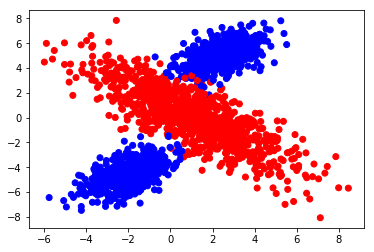

In [5]:
#2. plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

In [6]:
#3. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim, output_dim)

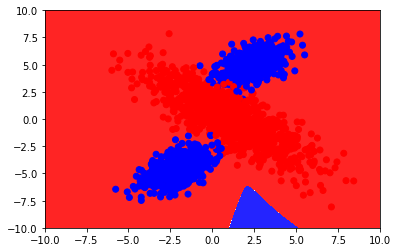

In [7]:
#4. Plot decision boundary
plot_decision_boundary(logreg, X, y)

## Train Classification Model
**Classification** tries to predict, which of a small set of classes, a sample in a population belongs to. Mathematically, the aim is to find $y$, a **label** based on knowing a feature vector $X$.

In [8]:
#5. Train the model
logreg.fit(X,y,2000,alpha=0.001)

0

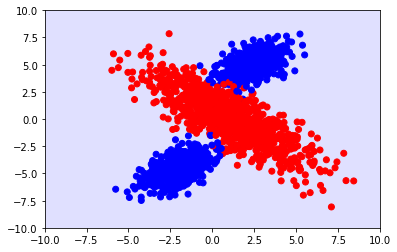

In [9]:
#6. Plot decision boundary after trainning
plot_decision_boundary(logreg, X, y)

## Model Evaluation

In [10]:
#7. ompute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

('ACCURACY: ', 0)
('CONFUSION MATRIX: \n', array([[1000., 1000.],
       [   0.,    0.]]))


In [23]:
matrix=np.zeros((3,3))

matrix[0][0]=98
matrix[1][1]=81
matrix[2][2]=95
matrix[1][0]=17
matrix[1][2]=2
matrix[0][1]=2
matrix[2][0]=3
matrix[2][1]=2
print ('ACCURACY: '+str((98+81+95)/300.0))
print ('CONFUSION MATRIX: \n'+str(matrix))
print ('PRECISION: '+str((98+81+95)/float((98+81+95+17+3+2))))
print ('RECALL: '+str((98+81+95)/float((98+81+95+4))))
print ('F1-SCORE: '+str((2*(98+81+95))/float(((2*(98+81+95))+22+4))))

ACCURACY: 0.913333333333
CONFUSION MATRIX: 
[[98.  2.  0.]
 [17. 81.  2.]
 [ 3.  2. 95.]]
PRECISION: 0.925675675676
RECALL: 0.985611510791
F1-SCORE: 0.954703832753
